#Khai báo các thư viện cần dùng


In [ ]:
!pip install -q category-encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.6 MB/s eta 0:00:00


#Phần I: Tiền xử lý dữ liệu

##Xử lý dữ liệu

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('music_genre.csv')

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
#Hiển thị kích thước của dữ liệu
df.shape

(50005, 18)

Hiển thị các thông tin của data:


*   Số hàng và số cột của data
*   Số lượng giá trị giữ liệu bị thiếu của từng cột


*   Tổng dung lượng bộ nhớ mà data sử dụng






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
#Độ cân bằng dữ liệu
print(df['music_genre'].value_counts())
df['music_genre'].value_counts(True)

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


,proportion
music_genre,
Electronic,0.1
Anime,0.1
Jazz,0.1
Alternative,0.1
Country,0.1
Rap,0.1
Blues,0.1
Rock,0.1
Classical,0.1


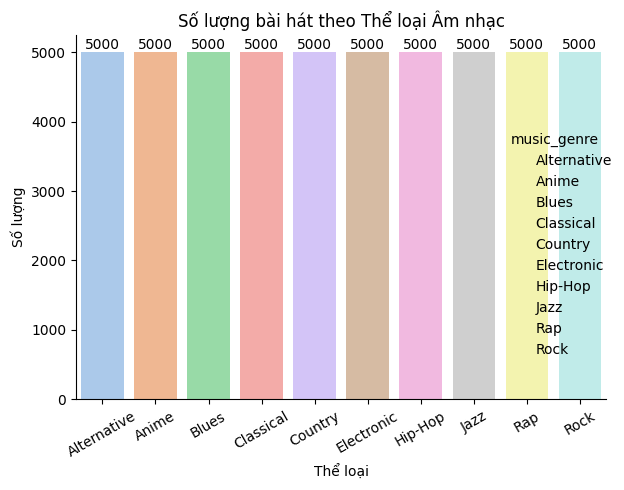

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import FuncFormatter

# Vẽ biểu đồ cột đếm theo cột 'music_genre'
f = sns.catplot(x='music_genre', data=df.sort_values('music_genre'),
                kind='count', palette='pastel')

# Lấy trục đang vẽ
ax = f.facet_axis(0, 0)

# Đặt tên nhãn trên trục X đúng thứ tự theo dataset
ax.set_xticklabels(sorted(map(str, df['music_genre'].dropna().unique())), rotation=30)



# Thêm tiêu đề và tên trục
ax.set_title('Số lượng bài hát theo Thể loại Âm nhạc')
ax.set_xlabel('Thể loại')
ax.set_ylabel('Số lượng')

# Thêm nhãn số trên đầu mỗi cột
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), value,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()





In [ ]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy

`duplicated()` (Kiểm tra trùng lặp): Hàm này trả về một chuỗi (Series) Boolean (`True/False`) có cùng độ dài với đối tượng ban đầu.

`duplicated().sum()`: Đếm tổng số hàng (hoặc giá trị) bị trùng lặp (tức là tổng số bản sao).

`isna()`:Trả về một DataFrame với các giá trị boolean, trong đó `True` chỉ ra giá trị bị thiếu (NaN) và `False` chỉ ra giá trị không bị thiếu.

`isna().sum()` trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame

In [ ]:
print("Số dòng trùng lặp:", df.duplicated().sum())

missing_before = df.isna().sum()
missing_count = missing_before.sum()

print(f"Tổng số giá trị bị thiếu trước khi xử lý: {missing_count} ({missing_count/df.size*100:.2f}%)")
print(f"\nChi tiết missing values theo từng cột:")
print(missing_before[missing_before > 0].sort_values(ascending=False))

Số dòng trùng lặp: 4
Tổng số giá trị bị thiếu trước khi xử lý: 5070 (0.56%)

Chi tiết missing values theo từng cột:
tempo               4985
instance_id            5
artist_name            5
track_name             5
acousticness           5
popularity             5
duration_ms            5
energy                 5
instrumentalness       5
danceability           5
key                    5
liveness               5
mode                   5
loudness               5
speechiness            5
obtained_date          5
valence                5
music_genre            5
dtype: int64


`drop_duplicates()`: Xóa bỏ các hàng bị trùng lặp khỏi DataFrame.

`dropna()`: Xóa bỏ các giá giá trị bị thiếu(NaN).

In [ ]:
df = df.drop_duplicates().dropna()

In [ ]:
X = df.drop(['music_genre', 'instance_id'], axis=1) # tách thêm instance_id: đó là ID của các bài hát
y = df['music_genre']

In [ ]:
X.shape

(45020, 16)

In [ ]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 45020
Số cột dữ liệu (tập X): 16


##Mã hóa dữ liệu bằng Onehot encode và label encode trong thư viện Sklearn và TargetEncoder

In [ ]:
X_origin = X.copy()
#X_origin['obtained_date'] = pd.to_datetime(X_origin['obtained_date'], format='%d-%b', errors='coerce')
y_origin = y.copy()

In [ ]:
onehot_columns = ['key', 'mode']
target_columns = ['artist_name', 'track_name', 'obtained_date']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)

# Gộp với cột số
columns_to_drop = onehot_columns + target_columns
X_encode = pd.concat([
    X_origin.drop(columns=columns_to_drop),
    X_encoded_df
], axis=1)

# ========================================
# KẾT QUẢ
# ========================================
print("DataFrame đã mã hóa hoàn chỉnh:")
print(X_encode)
print(f"\nShape: {X_encode.shape}")

DataFrame đã mã hóa hoàn chỉnh:
       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  ...  \
0               0.79200     0.115    -5.201       0.0

In [ ]:
X_encode.shape

(45020, 27)

Nhận xét:

Dữ liệu X ban đầu code shape là: (45020, 16)
Sau khi encode thì X có dạng: (45020, 26)
Các cột sau khi qua One hot encode thì các categories sẽ tạo thêm cột mới trương ứng với các categories để biểu diễn dữ liệu. Ví dụ cột A chứa kiểu cate như: A1, A2, A3 thì sau khi encode thì sẽ tạo thêm các cột mới và đánh dẫu xem mẫu nào thì tương ứng với A1, 2, 3...

In [ ]:
le = LabelEncoder()
y_encode = le.fit_transform(y)

In [ ]:
y_encode

array([5, 5, 5, ..., 6, 6, 6])

##Chia dữ liệu

In [ ]:
#Dữ liệu liên tục
continous_data = [
    'popularity', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
#Dữ liệu rời rạc
classified_data = ['artist_name', 'track_name', 'key', 'mode', 'obtained_date']

In [ ]:
X_continous = X_origin[continous_data]     #Dữ liệu liên tục
X_classified = X_origin[classified_data]   #Dữ liệu rời rạc

In [ ]:
X_continous

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323
...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,98.028,0.330
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,122.043,0.113
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,75.886,0.354


In [ ]:
X_classified

,artist_name,track_name,key,mode,obtained_date
0,Röyksopp,Röyksopp's Night Out,A#,Minor,4-Apr
1,Thievery Corporation,The Shining Path,D,Minor,4-Apr
2,Dillon Francis,Hurricane,G#,Major,4-Apr
3,Dubloadz,Nitro,C#,Major,4-Apr
4,What So Not,Divide & Conquer,F#,Major,4-Apr
...,...,...,...,...,...
50000,BEXEY,GO GETTA,C#,Major,4-Apr
50001,Roy Woods,Drama (feat. Drake),B,Major,4-Apr
50002,Berner,Lovin' Me (feat. Smiggz),D,Major,4-Apr
50003,The-Dream,Shawty Is Da Shit,G,Minor,4-Apr


###Chuẩn hóa dữ liệu liên tục (Sử dụng gói thư viện `StandardScaler` trong thư viện Sklearn)




Để chuẩn hóa dữ liệu, ở đây chúng tôi sử dụng gói `sklearn.preprocessing.StandardScaler` trong thư viện sklearn.

Về  `StandardScaler` là một kỹ thuật chia tỷ lệ đặc trưng tuân theo phân phối chuẩn và được sử dụng để chuẩn hóa giá trị của các đặc trưng số. Nó biến đổi dữ liệu sao cho giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1. Kỹ thuật này lý tưởng cho các thuật toán như SVM, hồi quy logistic hoặc mạng nơ-ron nhân tạo giả định dữ liệu phân phối chuẩn.

Phương pháp này trừ đi giá trị trung bình của dữ liệu và chia cho độ lệch chuẩn. Phương pháp này tập trung dữ liệu quanh giá trị 0 và chuẩn hóa độ biến thiên:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Trong đó:
- `X` là giá trị ban đầu,
- `μ` là giá trị trung bình của tính năng,
- `σ` là độ lệch chuẩn.

Về ưu điểm:
- Nó xử lý các tính năng với các đơn vị khác nhau một cách hiệu quả.
- Nó làm giảm tác động của các giá trị ngoại lai mà không loại bỏ chúng hoàn toàn.

Về nhược điểm:
- Nó nhạy cảm với các giá trị ngoại lệ và các giá trị cực đoan có thể làm lệch giá trị trung bình và độ lệch chuẩn, dẫn đến khả năng mở rộng kém.
- Nó không lý tưởng cho các phân phối không chuẩn.

In [ ]:
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)

In [ ]:
X_continous_scaled

array([[-1.10991062, -0.8843778 ,  0.52258528, ..., -0.1870859 ,
        -0.6221643 ,  1.22434325],
       [-0.85273873, -0.86088544,  0.35485278, ..., -0.62860616,
        -0.1615777 ,  0.30185558],
       [-1.04561764, -0.88912314,  0.34367061, ..., -0.58425703,
         0.26242436, -0.49925212],
       ...,
       [ 0.4331207 , -0.88059911,  0.75181969, ...,  0.51461595,
         0.36310527, -0.24840021],
       [ 1.3332223 , -0.65466816,  1.2494261 , ..., -0.48964554,
        -1.43815287, -0.41428615],
       [ 1.46180824, -0.59930586,  1.69671277, ...,  0.07112461,
        -0.67725324,  1.24861924]])

In [ ]:
# đưa về dạng df cho dễ nhìn
X_continous_std_df = pd.DataFrame(X_continous_scaled)
X_continous_std_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.109911,-0.884378,0.522585,-1.732130,1.290882,1.872550,-0.488216,0.639344,-0.187086,-0.622164,1.224343
1,-0.852739,-0.860885,0.354853,-0.022528,1.098070,2.357446,-0.432561,0.340140,-0.628606,-0.161578,0.301856
2,-1.045618,-0.889123,0.343671,-0.043517,0.587686,-0.521854,2.102795,0.734206,-0.584257,0.262424,-0.499252
3,-0.659860,-0.823684,1.204697,-0.425216,0.379752,-0.550303,-0.228496,0.753536,1.431165,0.263077,-0.754150
4,-0.788446,-0.884466,0.444310,0.009394,-0.047459,2.231618,-0.228496,0.466352,-0.517241,0.818601,-0.539712
...,...,...,...,...,...,...,...,...,...,...,...
45015,0.947464,-0.800251,1.981858,-1.732130,-0.096607,-0.558068,-0.463480,0.343551,2.012631,-0.715535,-0.511390
45016,1.783273,-0.438199,0.841277,0.240357,-0.898099,-0.558068,-0.525318,-0.109966,-0.382222,0.068210,-1.389372
45017,0.433121,-0.880599,0.751820,-0.248158,0.617931,-0.558068,-0.315069,0.600035,0.514616,0.363105,-0.248400
45018,1.333222,-0.654668,1.249426,0.325824,-0.482231,-0.558068,-0.543870,0.669395,-0.489646,-1.438153,-0.414286


#### Mô tả dữ liệu sau khi chuẩn hóa

Sau khi chuẩn hóa bằng `StandardScaler`, Các giá trị dao động quanh 0, thường nằm trong khoảng từ -3 đến 3, Các cột có trung bình ≈ 0, độ lệch chuẩn ≈ 1

In [ ]:
X_continous_std_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04
mean,-1.313131e-16,1.010101e-17,-4.242423e-16,-7.575756e-17,3.535353e-17,1.010101e-16,-1.515151e-17,1.262626e-16,-6.060604e-17,-2.427398e-16,-4.292928e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.845821e+00,-8.980866e-01,-2.789572e+00,-1.732130e+00,-2.263691e+00,-5.580676e-01,-1.139555e+00,-6.157723e+00,-7.044925e-01,-2.793804e+00,-1.846570e+00
25%,-6.598598e-01,-8.392092e-01,-6.515422e-01,-3.637528e-01,-6.334556e-01,-5.580676e-01,-6.001424e-01,-2.798719e-01,-5.684884e-01,-8.162647e-01,-8.067480e-01
50%,4.736287e-02,-4.733493e-01,5.293428e-02,-1.355658e-02,1.604754e-01,-5.575796e-01,-4.201939e-01,3.009934e-01,-4.423398e-01,-2.413750e-03,-3.396229e-02
75%,7.545856e-01,7.159151e-01,7.182732e-01,3.717724e-01,8.154686e-01,-8.544756e-02,3.094941e-01,6.432427e-01,4.944282e-02,6.696272e-01,7.752374e-01
max,3.519183e+00,2.019419e+00,2.390007e+00,3.349460e+01,1.510158e+00,2.498618e+00,4.984444e+00,2.092320e+00,8.359485e+00,3.274105e+00,2.167061e+00


#Phần II: Phần tích và trực quan hóa dữ liệu

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


##Phân tích các tham số và thống kê dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Chi tiết về khái niệm của các trường:

| STT | Thuộc tính                 | Loại dữ liệu | Định nghĩa thuộc tính                      | Mô tả thuộc tính                                                                 |
| --- | -------------------------- | ------------ | ------------------------------------------ | -------------------------------------------------------------------------------- |
| 1   |         instance_id                | Mã định danh    | Mã định danh duy nhất                                      |      Một số (ví dụ: 32894.0) dùng để xác định mỗi hàng dữ liệu.                                                                            |
| 2   | artist_name                  | Phân loại    | Tên nghệ sĩ                       | Tên của nghệ sĩ hoặc ban nhạc (ví dụ: "Röyksopp").                                                                         |
| 3   | track_name            | Phân loại    | Tên bài hát                         | Tên của bài hát (ví dụ: "Röyksopp's Night Out").                                  |
| 4   | popularity                 | Số (Thứ bậc)    |Mức độ phổ biến                        |   Một thang điểm (thường từ 0-100) cho biết mức độ phổ biến của bài hát.                                                                               |
| 5   | acousticness                 | Số (Liên tục)    | Độ "acoustic" (mộc)                         | Thang đo từ 0.0 đến 1.0. Giá trị cao cho thấy bài hát có tính acoustic (ít dùng nhạc cụ điện tử).                                |
| 6   | danceability         | Số (Liên tục)    | Khả năng nhảy       |     Thang đo từ 0.0 đến 1.0, dựa trên nhịp độ, sự ổn định của nhịp, và sức mạnh của nhịp.                                                                             |
| 7   | duration_ms                  | Số (Liên tục)    | Thời lượng bài hát                          | Thời lượng của bài hát, tính bằng mili-giây (ms).          |
| 8   | energy            | Số (Liên tục)    | Năng lượng                          | Thang đo từ 0.0 đến 1.0. Bài hát năng lượng cao thường nhanh, ồn ào (ví dụ: nhạc rock). |
| 9   |instrumentalness             | Số (Liên tục)    | Tỷ lệ không lời                         |                 Thang đo từ 0.0 đến 1.0. Giá trị càng gần 1.0, khả năng bài hát không có lời càng cao.                                                                 |
| 10  |key            | Phân loại    | Tone/Khóa nhạc                            |                Tone chính của bài hát (ví dụ: A#, D, G#).                                |
| 11  | liveness   | Số (Liên tục)    | Mức độ "trực tiếp"     | 1Thang đo từ 0.0 đến 1.0, phát hiện sự hiện diện của khán giả trong bản thu (cho biết bài hát có thể được thu live).                                   |
| 12  | loudness                     | Số (Liên tục)   | Độ lớn                                  | Độ lớn trung bình của bài hát, tính bằng decibel (dB) (ví dụ: -5.201).                                                                   |
| 13  | mode                | Phân loại    | Chế độ (Trưởng/Thứ)                         |                                               Cho biết bài hát ở chế độ Trưởng (Major) hay Thứ (Minor).                                   |
| 14  | speechiness            | Số (Liên tục)   | Tỷ lệ lời nói              | 1Thang đo từ 0.0 đến 1.0. Giá trị cao (gần 1.0) cho thấy nhiều lời nói (ví dụ: podcast). Giá trị thấp (dưới 0.33) có thể là nhạc hát.                                   |
| 15  | tempo                  | Số (Liên tục)    | Nhịp độ                          |                     Nhịp độ của bài hát, tính bằng nhịp mỗi phút (BPM).                                                             |
| 16  | obtained_date                   | Thời gian    | Ngày lấy dữ liệu                          | Ngày mà dữ liệu của bài hát này được thu thập (ví dụ: "4-Apr").                                    |
| 17  | valence           | Số (Liên tục)    | Mức độ tích cực               | Thang đo từ 0.0 đến 1.0. Giá trị cao (gần 1.0) thể hiện cảm xúc tích cực (vui vẻ); giá trị thấp (gần 0.0) thể hiện cảm xúc tiêu cực (buồn bã).                                   |
| 18  | music_genre             | Phân loại    | Thể loại nhạc                        | Thể loại của bài hát (ví dụ: "Electronic", "Hip-Hop", "Jazz"). Đây là biến mục tiêu cần dự đoán.                                                     |
                                                



In [ ]:
df.describe(include='all')

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
count,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000,50000,50000.000000,50000
unique,NaN,6863,41699,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,29394,5,NaN,10
top,NaN,empty_field,Home,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,?,4-Apr,NaN,Electronic
freq,NaN,2489,16,NaN,NaN,NaN,NaN,NaN,NaN,5727,NaN,NaN,32099,NaN,4980,44748,NaN,5000
mean,55888.396360,NaN,NaN,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,NaN,0.193896,-9.133761,NaN,0.093586,NaN,NaN,0.456264,NaN
std,20725.256253,NaN,NaN,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,NaN,0.161637,6.162990,NaN,0.101373,NaN,NaN,0.247119,NaN
min,20002.000000,NaN,NaN,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,NaN,0.009670,-47.046000,NaN,0.022300,NaN,NaN,0.000000,NaN
25%,37973.500000,NaN,NaN,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,NaN,0.096900,-10.860000,NaN,0.036100,NaN,NaN,0.257000,NaN
50%,55913.500000,NaN,NaN,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,NaN,0.126000,-7.276500,NaN,0.048900,NaN,NaN,0.448000,NaN
75%,73863.250000,NaN,NaN,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,NaN,0.244000,-5.173000,NaN,0.098525,NaN,NaN,0.648000,NaN


###Biểu đồ phát hiện giá trị ngoại lai


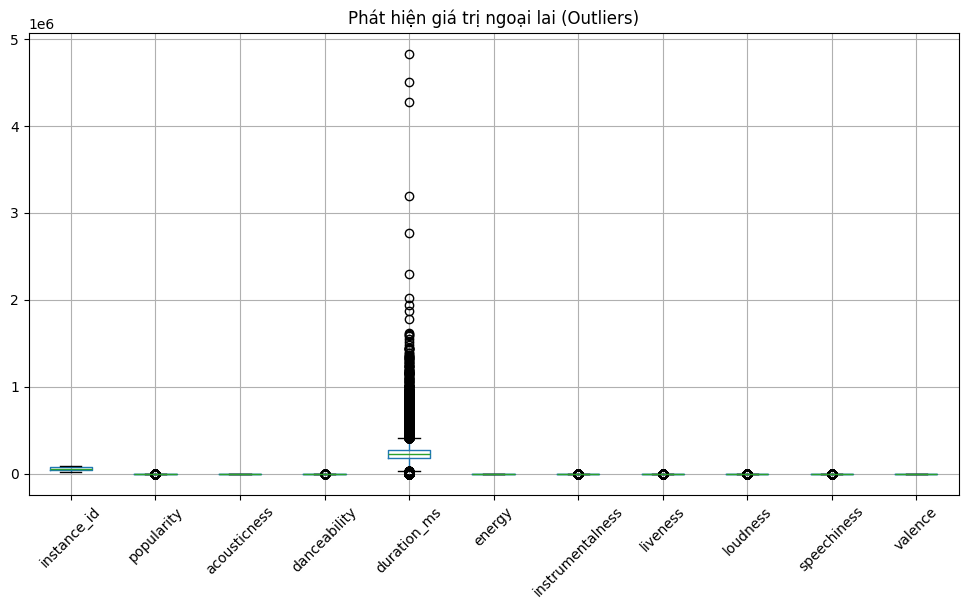

In [ ]:
plt.figure(figsize=(12, 6))
df.select_dtypes('number').boxplot()
plt.title("Phát hiện giá trị ngoại lai (Outliers)")
plt.xticks(rotation=45)
plt.show()

###Chia dữ liệu

In [ ]:
#Dữ liệu liên tục
continous_data = [
    'popularity','acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

#Dữ liệu rời rạc
classified_data = ['artist_name', 'track_name', 'key', 'mode', 'obtained_date']

####Biểu đồ thống kê dữ liệu liên tục

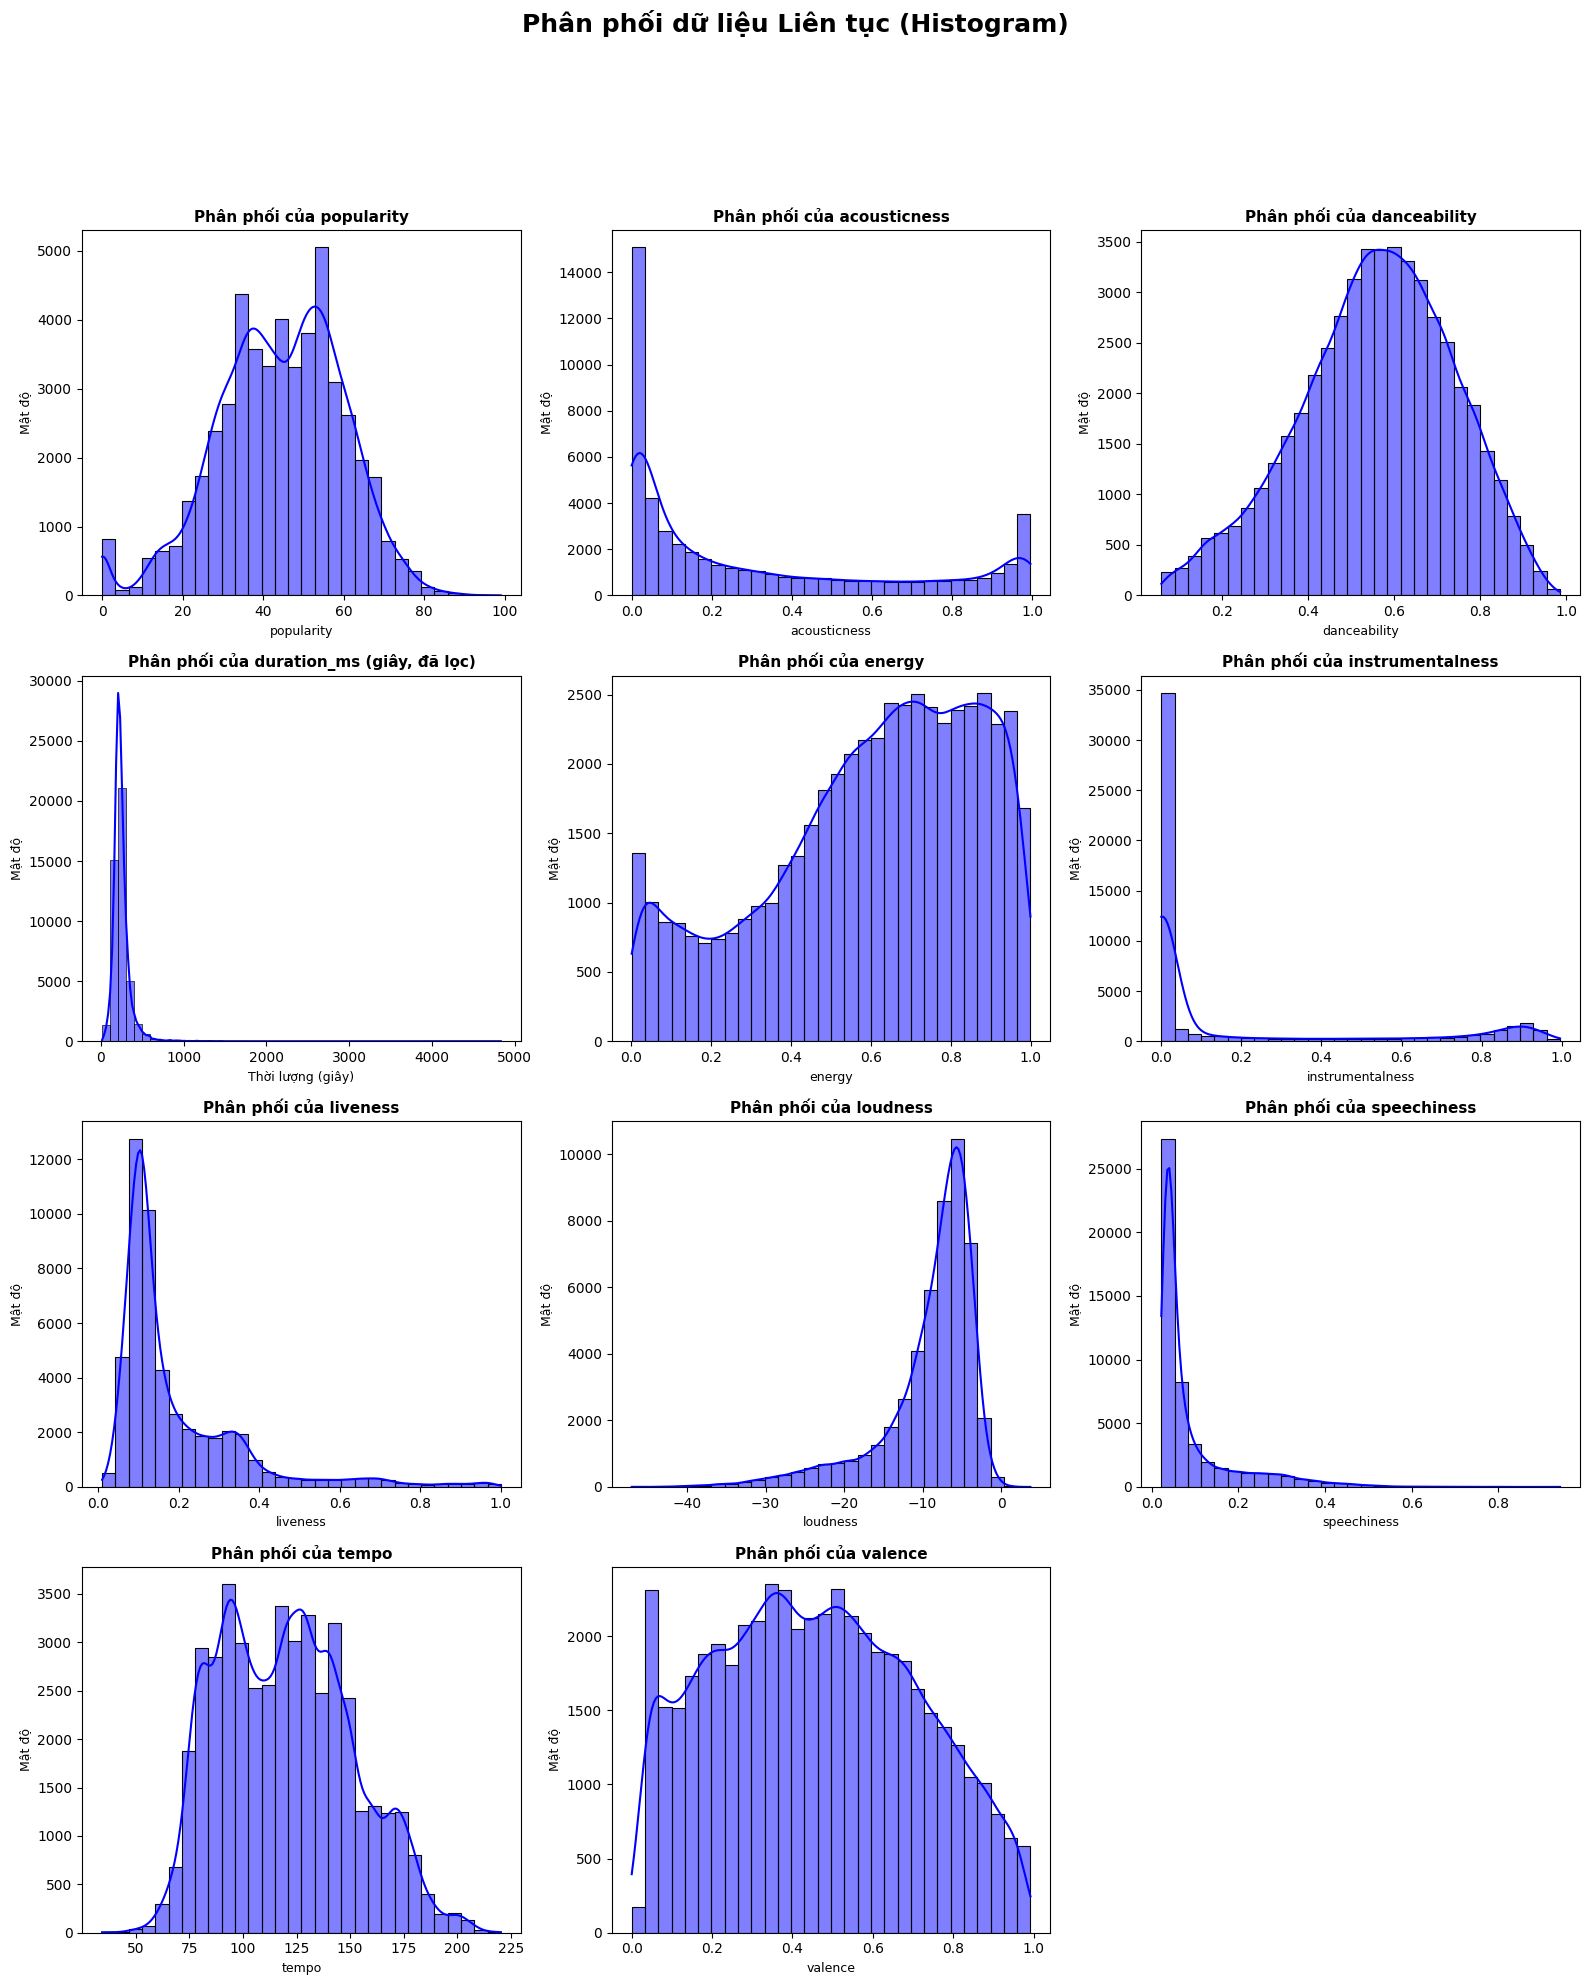

In [ ]:
cols_per_row = 3
rows = math.ceil(len(continous_data) / cols_per_row)

plt.figure(figsize=(16, 5 * rows))
plt.suptitle("Phân phối dữ liệu Liên tục (Histogram)", fontsize=18, fontweight='bold', y=1.02)

for i, col in enumerate(continous_data, 1):
    plt.subplot(rows, cols_per_row, i)

    # Chuyển cột sang dạng số, bỏ qua các giá trị không hợp lệ
    numeric_data = pd.to_numeric(df[col], errors='coerce')

    # Xử lý đặc biệt cho 'duration_ms' vì có giá trị -1.0
    if col == 'duration_ms':
        # Lọc ra các giá trị > 0
        duration_data = numeric_data[numeric_data > 0]

        # Chuyển đổi sang giây cho dễ đọc (ms / 1000)
        duration_in_seconds = duration_data / 1000

        sns.histplot(duration_in_seconds, kde=True, bins=50, color='blue')
        plt.title(f"Phân phối của {col} (giây, đã lọc)", fontsize=11, fontweight='bold')
        plt.xlabel("Thời lượng (giây)", fontsize=9)

    # Xử lý các cột số khác
    else:
        # Bỏ qua các giá trị NaN
        valid_data = numeric_data.dropna()
        sns.histplot(valid_data, kde=True, bins=30, color='blue')
        plt.title(f"Phân phối của {col}", fontsize=11, fontweight='bold')
        plt.xlabel(col, fontsize=9)

    plt.ylabel("Mật độ", fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

####Biểu đồ thống kê dữ liệu rời rạc


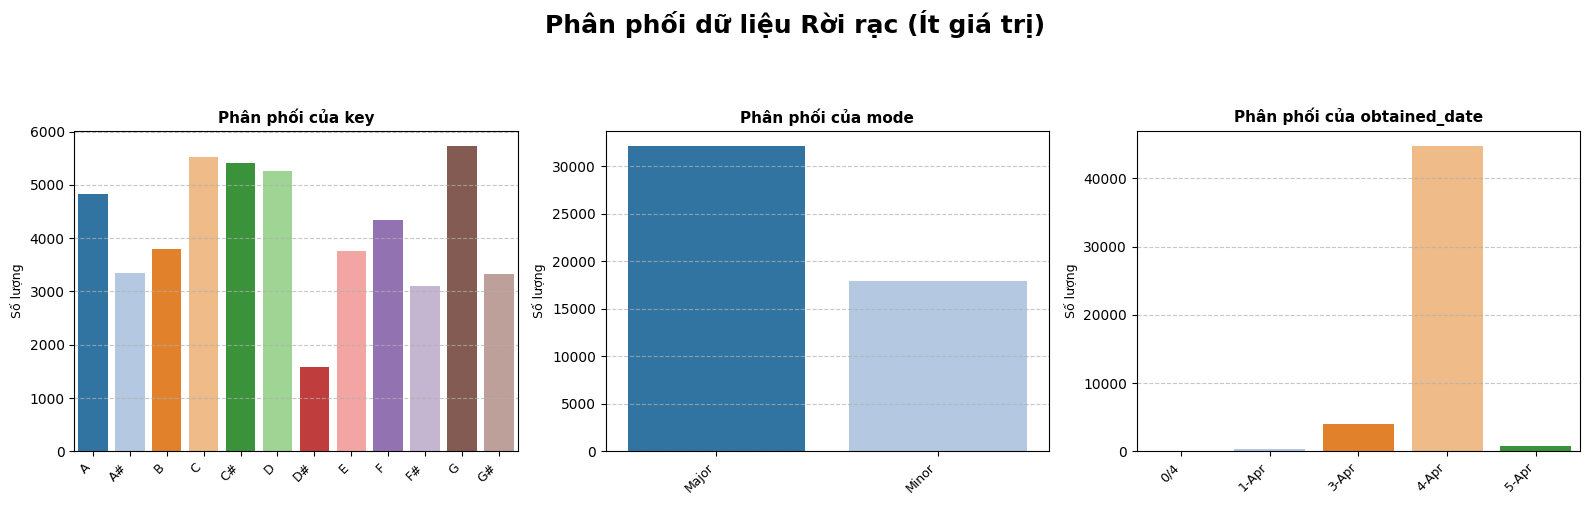

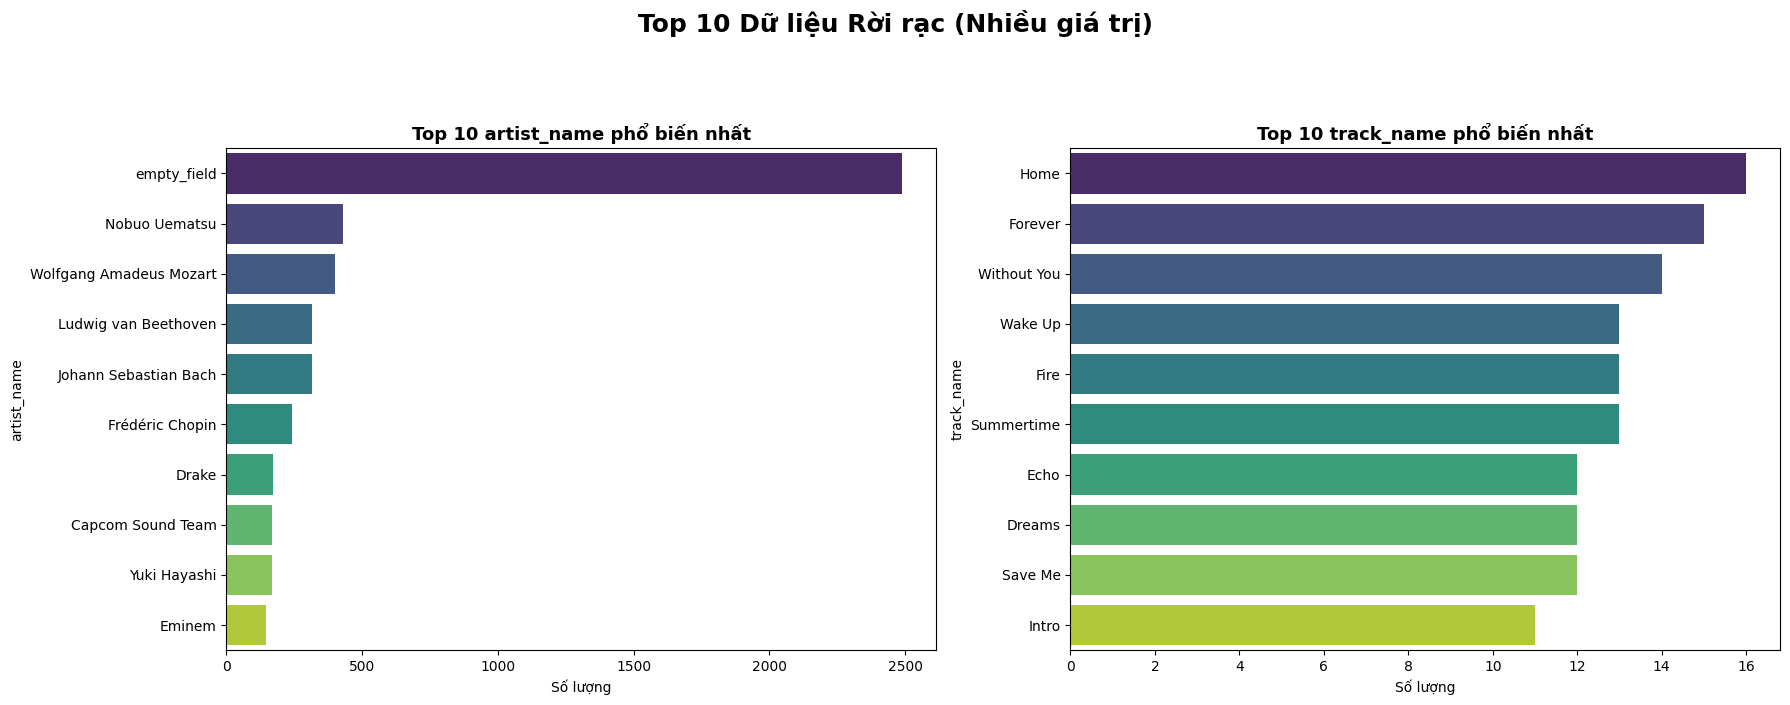

In [ ]:
# --- 1A: BIỂU ĐỒ CHO BIẾN RỜI RẠC (ÍT GIÁ TRỊ) ---
classified_low_cardinality = ['key', 'mode', 'obtained_date']

cols_per_row = 3
rows = math.ceil(len(classified_low_cardinality) / cols_per_row)

plt.figure(figsize=(16, 5 * rows))
plt.suptitle("Phân phối dữ liệu Rời rạc (Ít giá trị)", fontsize=18, fontweight='bold', y=1.03)

for i, col in enumerate(classified_low_cardinality, 1):
    plt.subplot(rows, cols_per_row, i)

    # Đếm số lượng
    data_counts = df[col].value_counts().sort_index()

    # Giới hạn 20 giá trị đầu (phòng trường hợp 'obtained_date' có nhiều)
    if len(data_counts) > 20:
        data_counts = data_counts.head(20)
        plt.title(f"Top 20 giá trị cho {col}", fontsize=11, fontweight='bold')
    else:
        plt.title(f"Phân phối của {col}", fontsize=11, fontweight='bold')

    # Dùng barplot của seaborn
    sns.barplot(x=data_counts.index, y=data_counts.values, palette="tab20")

    plt.xlabel("")
    plt.ylabel("Số lượng", fontsize=9)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- 1B: BIỂU ĐỒ CHO BIẾN RỜI RẠC (TOP 10 GIÁ TRỊ PHỔ BIẾN NHẤT) ---
classified_high_cardinality = ['artist_name', 'track_name']

plt.figure(figsize=(18, 7))
plt.suptitle("Top 10 Dữ liệu Rời rạc (Nhiều giá trị)", fontsize=18, fontweight='bold', y=1.03)

for i, col in enumerate(classified_high_cardinality, 1):
    plt.subplot(1, 2, i) # 1 hàng, 2 cột

    # Lấy 10 giá trị phổ biến nhất
    data_counts = df[col].value_counts().head(10)

    # Dùng barplot ngang (dễ đọc tên hơn)
    sns.barplot(x=data_counts.values, y=data_counts.index, palette='viridis')

    plt.title(f"Top 10 {col} phổ biến nhất", fontsize=13, fontweight='bold')
    plt.xlabel("Số lượng", fontsize=10)
    plt.ylabel(col, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###Ma trận tương quan

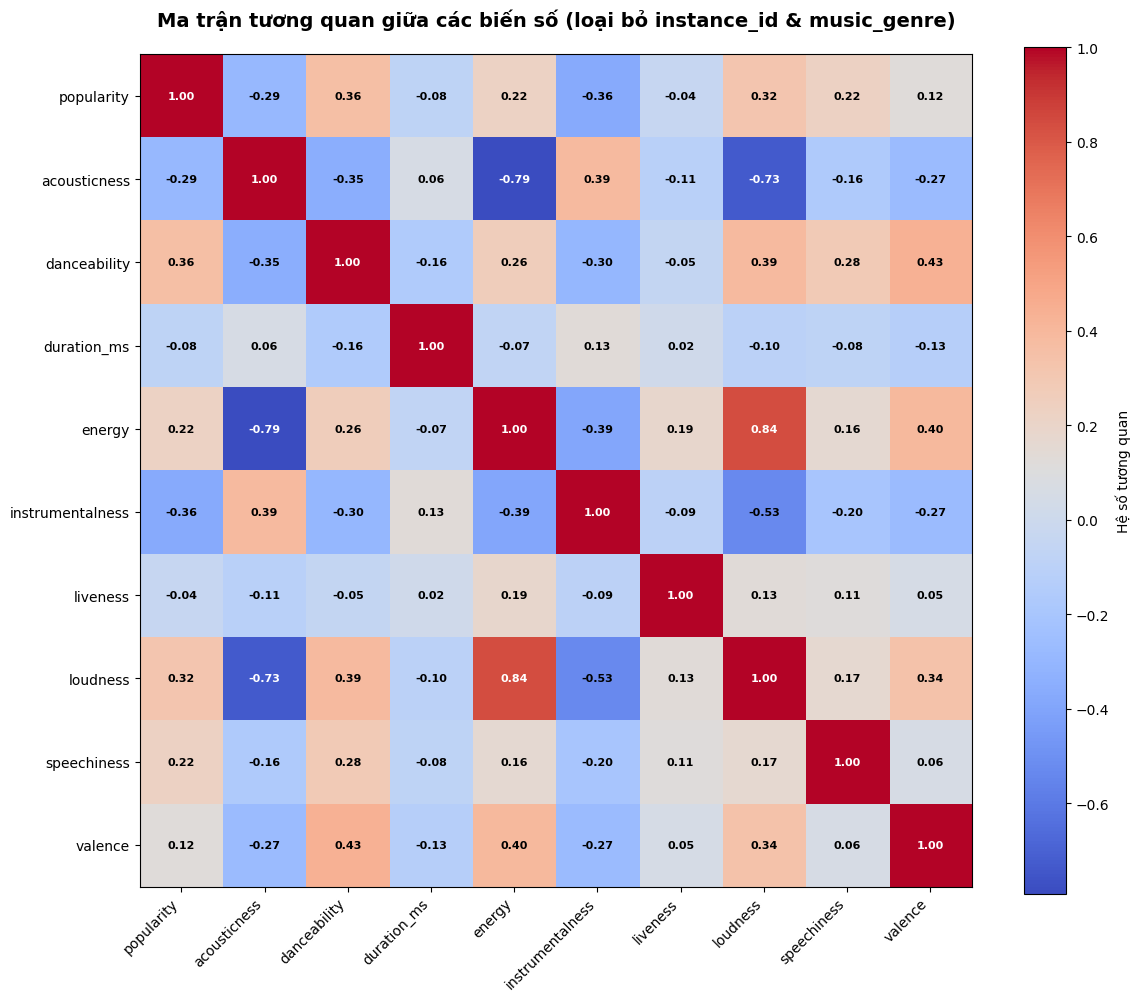

In [ ]:
import matplotlib.pyplot as plt

cols_to_drop = ['instance_id', 'music_genre']
corr = df.drop(columns=cols_to_drop, errors='ignore').corr(numeric_only=True)

# Vẽ biểu đồ
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Hệ số tương quan')

# Nhãn trục
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)
plt.title("Ma trận tương quan giữa các biến số (loại bỏ instance_id & music_genre)",
          fontsize=14, fontweight='bold', pad=20)

# Hiển thị giá trị hệ số
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = f"{corr.iloc[i, j]:.2f}"
        plt.text(j, i, text,
                 ha='center', va='center',
                 color='black' if abs(corr.iloc[i, j]) < 0.6 else 'white',
                 fontsize=8, fontweight='bold')

plt.grid(False)
plt.tight_layout()
plt.show()


## Chuẩn hóa dữ liệu và đánh giá các thành phần chính (của dữ liệu gốc hoặc sau khi phân thích thành phần chính) theo các tham số thống kê.

In [ ]:

df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce') #đưa dữ liệu về dạng numpy

In [ ]:
df = df.drop_duplicates().dropna()

In [ ]:
#Chuẩn bị dữ liệu
X_continous = df[continous_data]
X_classified = df[classified_data]
y = df['music_genre']

###Chuẩn hóa dữ liệu

In [ ]:
onehot_columns = ['key', 'mode']
target_columns = ['artist_name', 'track_name', 'obtained_date']

# One-Hot
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X_origin[onehot_columns])
ohe_cols = onehot_encoder.get_feature_names_out(onehot_columns)

# Target Encoding
target_encoder = TargetEncoder(smoothing=1.0)
X_target = target_encoder.fit_transform(X_origin[target_columns], y)
target_cols = [f"{col}_target" for col in target_columns]

# Gộp
X_encoded = np.hstack([X_onehot, X_target.values])
final_cols = np.concatenate([ohe_cols, target_cols])

X_classified_encoded_df = pd.DataFrame(X_encoded, columns=final_cols, index=X.index)



# Chuẩn hóa biến liên tục
scaler = StandardScaler()
X_continous_scaled = scaler.fit_transform(X_continous)
# Đưa phần liên tục về DataFrame
X_continous_scaled_df = pd.DataFrame(X_continous_scaled, columns=continous_data, index=df.index)
# Gộp hai phần lại thành DataFrame X hoàn chỉnh
X = pd.concat([X_continous_scaled_df, X_classified_encoded_df], axis=1)
# Mã hóa nhãn đầu ra y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Kích thước X:", X.shape)
print("Số lượng cột:", len(X.columns))
print()
X.head()

Kích thước X: (45020, 26)
Số lượng cột: 26



,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,artist_name_target,track_name_target,obtained_date_target
0,-1.109911,-0.884378,0.522585,-1.732130,1.290882,1.872550,-0.488216,0.639344,-0.187086,-0.622164,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.629521,4.510418,4.597504
1,-0.852739,-0.860885,0.354853,-0.022528,1.098070,2.357446,-0.432561,0.340140,-0.628606,-0.161578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.849558,4.510418,4.597504
2,-1.045618,-0.889123,0.343671,-0.043517,0.587686,-0.521854,2.102795,0.734206,-0.584257,0.262424,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.000000,4.510420,4.597504
3,-0.659860,-0.823684,1.204697,-0.425216,0.379752,-0.550303,-0.228496,0.753536,1.431165,0.263077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.510421,4.510418,4.597504
4,-0.788446,-0.884466,0.444310,0.009394,-0.047459,2.231618,-0.228496,0.466352,-0.517241,0.818601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.996723,4.510418,4.597504


###Thực hiện giảm chiều với PCA


In [ ]:
from sklearn.decomposition import PCA

# giảm còn 6 chiều
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(X)

# hiển thị dưới dạng dataframe
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])


In [ ]:
X_pca_df


,PC1,PC2,PC3,PC4,PC5,PC6
0,0.721706,-0.853730,-1.557415,0.232196,-0.038487,0.646146
1,0.429779,0.222086,0.154854,-0.950701,-0.325529,1.129352
2,1.002075,-0.810448,1.424581,0.916064,-0.437184,-0.013450
3,1.325385,-0.166159,-0.069229,0.614559,0.486528,-0.247889
4,-0.217389,-0.101942,0.484702,-0.787525,0.548905,0.990296
...,...,...,...,...,...,...
45015,1.825940,0.929991,-1.598990,1.355991,0.456740,-1.179999
45016,1.156257,2.716886,0.561741,-1.165050,0.369745,-0.888370
45017,1.476053,-0.242656,-0.106383,-0.171559,0.365757,-0.387962
45018,0.886172,0.746543,-0.806239,-0.840782,-1.300604,-1.313740


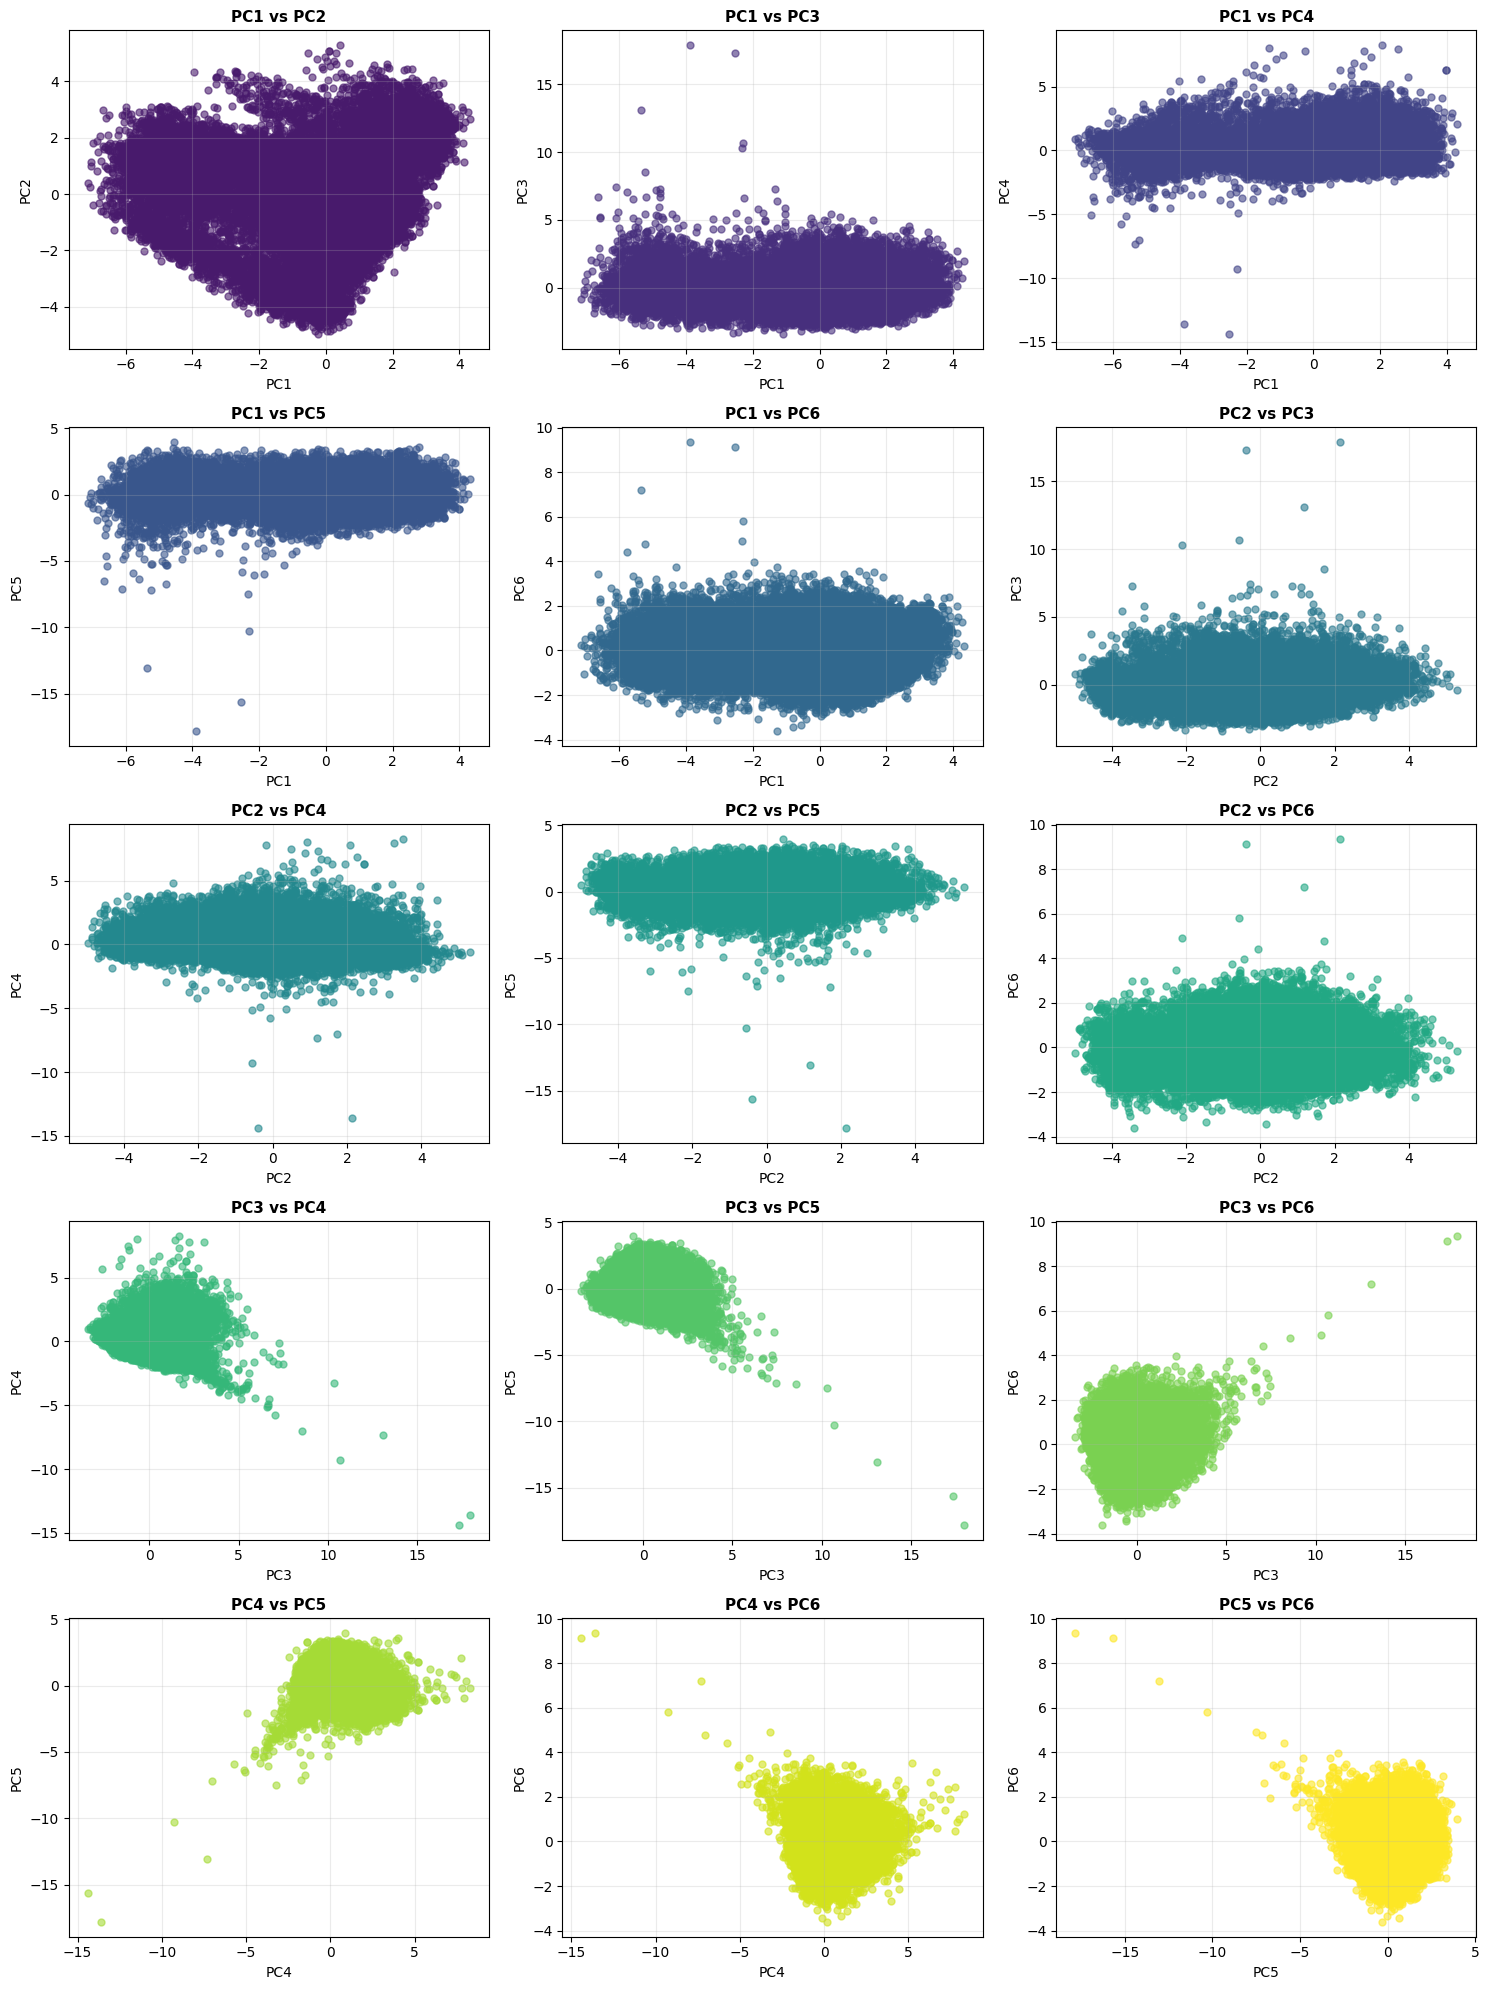

In [ ]:
import itertools

def visualize_pairs(X):
    cols = X.columns
    pairs = list(itertools.combinations(cols, 2))

    n_cols = 3
    n_rows = int(np.ceil(len(pairs) / n_cols))

    plt.figure(figsize=(15, 4 * n_rows))
    cmap_colors = plt.cm.get_cmap('viridis')

    for idx, (x_col, y_col) in enumerate(pairs, 1):
        plt.subplot(n_rows, n_cols, idx)
        plt.scatter(X[x_col], X[y_col], alpha=0.6, s=25, color=cmap_colors(idx / len(pairs)))
        plt.xlabel(x_col, fontsize=10)
        plt.ylabel(y_col, fontsize=10)
        plt.title(f"{x_col} vs {y_col}", fontsize=11, fontweight='bold')
        plt.grid(alpha=0.25)

    plt.tight_layout()
    plt.show()
visualize_pairs(X_pca_df)


In [ ]:
print("Phương sai giải thích của từng thành phần chính:")
print(np.real(pca.explained_variance_ratio_))


Phương sai giải thích của từng thành phần chính:
[0.28686139 0.14474431 0.08291467 0.07210809 0.06801119 0.05927551]


In [ ]:
explained_variance = np.real(pca.explained_variance_ratio_)
cumulative_variance = explained_variance.cumsum()

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")


PC1: 0.2869 (0.2869 tích lũy)
PC2: 0.1447 (0.4316 tích lũy)
PC3: 0.0829 (0.5145 tích lũy)
PC4: 0.0721 (0.5866 tích lũy)
PC5: 0.0680 (0.6546 tích lũy)
PC6: 0.0593 (0.7139 tích lũy)


Giải thích:

Phương sai tích lũy từ `PC1` đến `PC6` chỉ đạt **71.4%** (từ `PC1`: 28.69%, `PC2`: 14.47%, ..., `PC6`: 5.93%), tức là chỉ giữ lại **khoảng 71%** thông tin quan trọng của dữ liệu gốc.  

Mặc dù `PC1` chiếm tỷ lệ lớn nhất (28.69%), nhưng các thành phần sau giảm dần nhanh chóng, cho thấy **dữ liệu bị phân tán mạnh trên nhiều chiều**.

Chính vì vậy, nên chúng tôi thực nghiệm lại với dữ liệu liên tục, không sử dụng dữ liệu dạng categories.

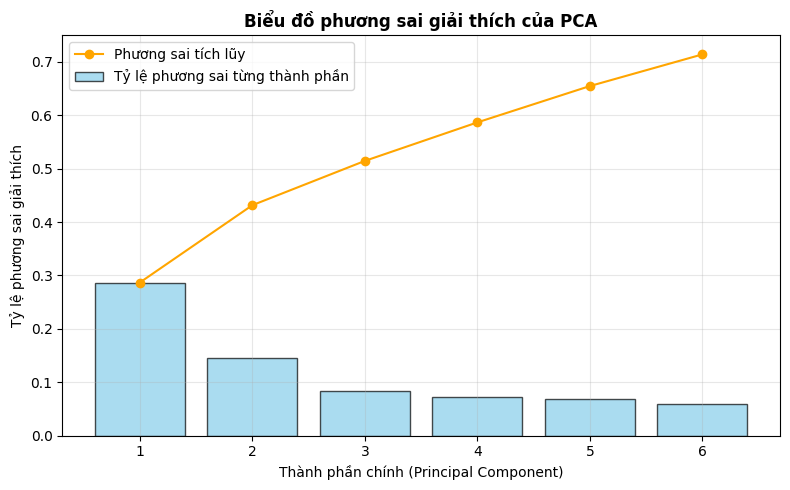

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance,
        alpha=0.7, color='skyblue', edgecolor='black', label='Tỷ lệ phương sai từng thành phần')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance,
         marker='o', color='orange', label='Phương sai tích lũy')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.xlabel('Thành phần chính (Principal Component)')
plt.ylabel('Tỷ lệ phương sai giải thích')
plt.title('Biểu đồ phương sai giải thích của PCA', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


####Thực hiện giảm chiều PCA trên dữ liệu liên tục


PC1: 0.3365 (0.3365 tích lũy)
PC2: 0.1215 (0.4580 tích lũy)
PC3: 0.0956 (0.5536 tích lũy)
PC4: 0.0892 (0.6428 tích lũy)
PC5: 0.0862 (0.7290 tích lũy)
PC6: 0.0754 (0.8043 tích lũy)


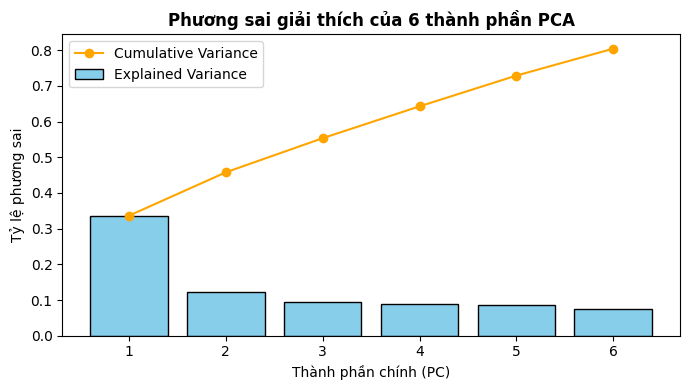

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=6))
])

X_continous_pca = pca_pipeline.fit_transform(X_continous)
X_continous_pca_df = pd.DataFrame(X_continous_pca,
                                  columns=[f'PC{i+1}_continous' for i in range(6)])

# Lấy thông tin PCA đã được fit
pca = pca_pipeline.named_steps['pca']

# Tính phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")

# Vẽ biểu đồ
plt.figure(figsize=(7, 4))
plt.bar(range(1, 7), explained_variance, color='skyblue', edgecolor='black', label='Explained Variance')
plt.plot(range(1, 7), cumulative_variance, marker='o', color='orange', label='Cumulative Variance')
plt.title('Phương sai giải thích của 6 thành phần PCA', fontsize=12, fontweight='bold')
plt.xlabel('Thành phần chính (PC)')
plt.ylabel('Tỷ lệ phương sai')
plt.xticks(range(1, 7))
plt.legend()
plt.tight_layout()
plt.show()


Nhận xét:  

Sau khi áp dụng PCA riêng cho **phần dữ liệu liên tục** (numerical features), phương sai tích lũy của **6 thành phần chính đầu tiên** đã **tăng đáng kể từ ~71.2% lên ~80.4%**, tức là **giữ lại thêm gần 10% thông tin quan trọng** so với trường hợp kết hợp cả dữ liệu phân loại đã mã hóa.  

- `PC1` chiếm **33.65%** – thành phần mạnh nhất, tập trung tốt hơn so với trước.  
- Chỉ cần **6 thành phần** đã giải thích được **80.4%** phương sai → hiệu quả giảm chiều cao.

###Thực hiện giảm chiều với LDA

**Về phương pháp LDA (Linear Discriminant Analysis)**

Phân tích phân biệt tuyến tính hay còn được gọi là Phân tích Phân biệt Chuẩn, là một bài toán phân loại có giám sát giúp phân tách hai hoặc nhiều lớp bằng cách chuyển đổi không gian dữ liệu nhiều chiều thành không gian ít chiều. Nó được sử dụng để xác định tổ hợp tuyến tính các đặc trưng giúp phân tách các lớp tốt nhất trong một tập dữ liệu.

**Cách hoạt động**
LDA hoạt động bằng cách tìm kiếm các hướng trong không gian đặc trưng để phân tách các lớp tốt nhất. Nó thực hiện điều này bằng cách tối đa hóa sự khác biệt giữa các giá trị trung bình của lớp trong khi giảm thiểu độ phân tán trong mỗi lớp.

Giả sử chúng ta có hai lớp với các mẫu có chiều như (`x₁, x₂, ..., xₙ`)

Trong đó:
- `N₁` mẫu thuộc về lớp `c₁`
- `N₂` mẫu thuộc về lớp `c₂`

Nếu như (xᵢ) biểu diễn một điểm dữ liệu, phép chiếu của nó lên đường được biểu diễn bởi vectơ đơn vị v là vᵀxᵢ.
Hãy để phương tiện của hai lớp (c₁) và (c₂) trước khi chiếu là μ₁ và μ₂ tương ứng.
Sau khi chiếu, các phương tiện mới là:

`μ̂₁ = vᵀμ₁
μ̂₂ = vᵀμ₂`

Mục tiêu của chúng ta là bình thường hóa sự khác biệt (`|μ̂₁ - μ̂₂|`) để tối đa hóa sự phân tách lớp.

Sự phân tán cho các mẫu của lớp (`c₁`) được tính như sau:
`S₁² = ∑ (vᵀxᵢ - μ̂₁)²` với xᵢ thuộc lớp `c₁`

Tương tự cho lớp (c₂):
`S₂² = ∑ (vᵀxᵢ - μ̂₂)²` với xᵢ thuộc lớp `c₂`

Hàm mục tiêu tối ưu

Mục tiêu là tối đa hóa tỷ lệ phân tán giữa các lớp so với phân tán trong lớp, điều này đưa chúng ta đến tiêu chí sau:
`J(v) = (μ̂₁ - μ̂₂)² / (S₁² + S₂²)`


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X, y)

In [ ]:
X_lda

array([[ 1.03419726, -1.06390449],
       [ 0.78458671, -0.08129841],
       [ 0.2639555 , -1.47917727],
       ...,
       [-1.4299713 , -0.71548726],
       [-2.52947408, -0.38860357],
       [-2.16399208,  1.17469239]])

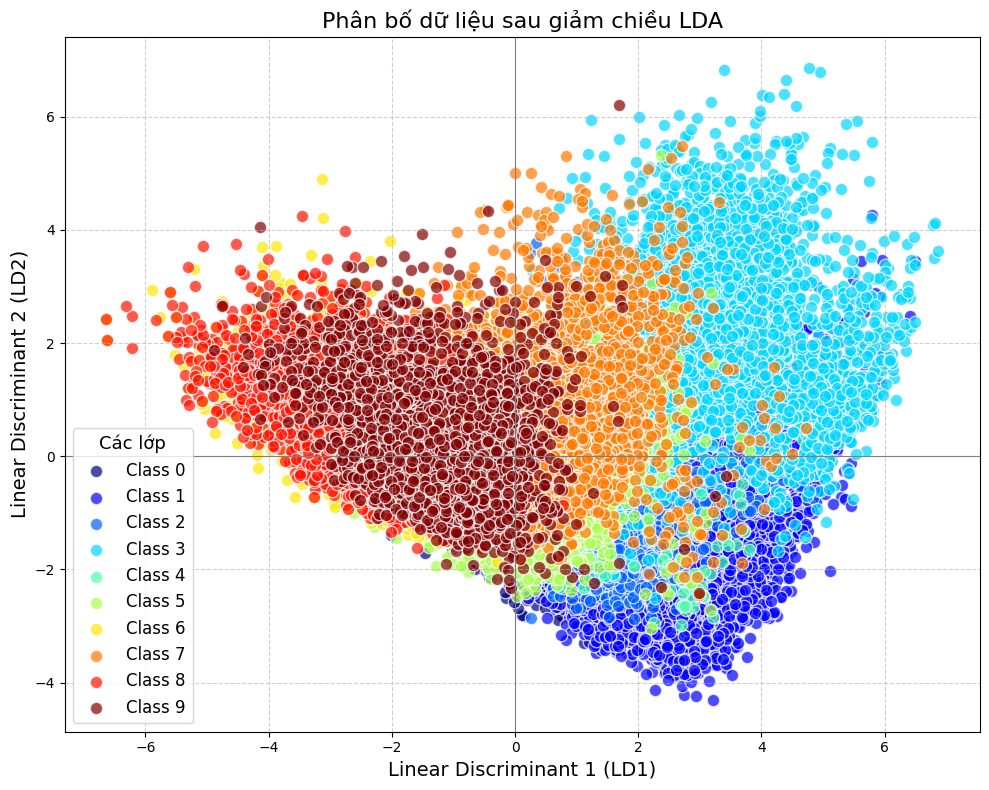

In [ ]:
# Tạo đồ thị
plt.figure(figsize=(10, 8))

# Lấy danh sách các nhãn lớp duy nhất
unique_classes = np.unique(y)

# Chọn một bảng màu
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))

# Vẽ từng lớp
for i, (class_label, color) in enumerate(zip(unique_classes, colors)):
    # Lấy các điểm dữ liệu thuộc về lớp hiện tại
    X_class = X_lda[y == class_label]
    plt.scatter(X_class[:, 0], X_class[:, 1], color=color, label=f'Class {class_label}',
                alpha=0.7, edgecolors='w', s=80)

plt.xlabel('Linear Discriminant 1 (LD1)', fontsize=14)
plt.ylabel('Linear Discriminant 2 (LD2)', fontsize=14)
plt.title('Phân bố dữ liệu sau giảm chiều LDA', fontsize=16)
plt.legend(title='Các lớp', fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

In [ ]:
explained_var_ratio = lda.explained_variance_ratio_
print("Phương sai giải thích của từng thành phần LDA:", explained_var_ratio)
print("Tổng lượng thông tin được bảo tồn:", explained_var_ratio.sum())


Phương sai giải thích của từng thành phần LDA: [0.63030229 0.17714434]
Tổng lượng thông tin được bảo tồn: 0.8074466265873089


Phương sai tích lũy của hai thành phần (`LD1` và `LD2`) đạt `~80.6%`. Con số này đại diện cho `80.7%` khả năng phân tách (separability) giữa các lớp đã được bảo toàn sau khi giảm chiều.

Phần lớn khả năng phân tách này (chiếm `63.7%`) được tập trung mạnh mẽ vào `LD1`. Điều này có nghĩa đây là  "trục" chính duy nhất mà trên đó, các lớp của bạn được phân biệt rõ rệt nhất. Gần `2/3` sức mạnh phân loại của dữ liệu nằm gọn trên thành phần đầu tiên này.

Phần khác, `LD2` (chiếm `17.0%`), đóng vai trò là trục quan trọng thứ hai, nắm bắt phần lớn thông tin phân tách còn lại mà `LD1` bỏ sót.

###So sánh các phương pháp đảo chiều

**Về phương pháp phân tích:**
| Tiêu chí        | PCA (Principal Component Analysis)              | LDA (Linear Discriminant Analysis)                          |
| --------------- | ----------------------------------------------- | ----------------------------------------------------------- |
| Mục tiêu        | Giảm chiều dữ liệu **theo phương sai lớn nhất** | Giảm chiều dữ liệu **theo khả năng phân biệt giữa các lớp** |
| Loại học        | Không giám sát (unsupervised)                   | Có giám sát (supervised)                                    |
| Dữ liệu yêu cầu | Không cần nhãn                                  | Cần nhãn lớp                                                |
| Kết quả chính   | Thành phần chính (PCs)                          | Trục phân biệt (Discriminant axis)                          |
| Số chiều tối đa | ≤ số đặc trưng                                  | ≤ (số lớp - 1)                                              |

**Về kết quả thực nghiệm:**

Sử dụng PCA trên dữ liệu ban đầu đã chuẩn hóa:

PC1: 0.2869 (0.2869 tích lũy)
PC2: 0.1447 (0.4316 tích lũy)
PC3: 0.0829 (0.5145 tích lũy)
PC4: 0.0721 (0.5866 tích lũy)
PC5: 0.0680 (0.6546 tích lũy)
PC6: 0.0593 (0.7139 tích lũy)

Phương sai tích lũy từ `PC1` đến `PC6` chỉ đạt **71.4%** (từ `PC1`: 28.69%, `PC2`: 14.47%, ..., `PC6`: 5.93%), tức là chỉ giữ lại **khoảng 71%** thông tin quan trọng của dữ liệu gốc. .Do một số vấn đề về dữ liệu bị pha loãng sau khi dùng One Hot Encode, khiến cho PCA kém hiệu quả.

Sử dụng PCA trên dữ liệu liên tục đã được chuẩn hóa:

PC1: 0.3365 (0.3365 tích lũy)
PC2: 0.1215 (0.4580 tích lũy)
PC3: 0.0956 (0.5536 tích lũy)
PC4: 0.0892 (0.6428 tích lũy)
PC5: 0.0862 (0.7290 tích lũy)
PC6: 0.0754 (0.8043 tích lũy)

Sau khi sử dụng giảm chiều cho dữ liệu liên tục thì phương sai lên đến `~80%`, giữ lại được nhiều thông tin. Tuy nhiên phương án này không phản ánh được toàn bộ tập dữ liệu ban đầu, do đây chỉ là một trong 2 phần của dữ liệu.

Sử dụng LDA trên dữ liệu ban đầu đã chuẩn hóa:

Phương sai tích lũy của hai thành phần (`LD1` và `LD2`) đạt `~80.7%`.

#Phần III: Các mô hình phân loại